# Kaggle - Tabular Playground Series - Jan 2022

# 1. Modulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#paths de los datos correspondiente al repositosio

train_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/test.csv'

In [3]:
#dataset de train

train = pd.read_csv(train_path)
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
train.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

Para poder realizar analisis por año y por meses incorporo columnas con estos valores

In [5]:
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['week'] = pd.to_datetime(train['date']).dt.week
train['day_month'] = pd.to_datetime(train['date']).dt.day
train['day_year'] = pd.to_datetime(train['date']).dt.dayofyear

train.sample(10)

,row_id,date,country,store,product,num_sold,year,month,week,day_month,day_year
14671,14671,2017-03-26,Finland,KaggleMart,Kaggle Hat,494,2017,3,12,26,85
11578,11578,2016-10-05,Finland,KaggleRama,Kaggle Hat,397,2016,10,40,5,279
22322,22322,2018-05-25,Finland,KaggleMart,Kaggle Sticker,133,2018,5,21,25,145
4663,4663,2015-09-17,Finland,KaggleMart,Kaggle Hat,232,2015,9,38,17,260
7286,7286,2016-02-09,Sweden,KaggleMart,Kaggle Sticker,97,2016,2,6,9,40
7585,7585,2016-02-26,Norway,KaggleMart,Kaggle Hat,582,2016,2,8,26,57
12172,12172,2016-11-07,Finland,KaggleRama,Kaggle Hat,486,2016,11,45,7,312
20805,20805,2018-03-01,Sweden,KaggleRama,Kaggle Mug,426,2018,3,9,1,60
17642,17642,2017-09-07,Finland,KaggleMart,Kaggle Sticker,97,2017,9,36,7,250
19813,19813,2018-01-05,Sweden,KaggleMart,Kaggle Hat,519,2018,1,1,5,5


In [6]:
#dataset de test

test = pd.read_csv(test_path)
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


# 2. Analisis Train

## 2.1 Analisis General

Text(0.5, 1.0, 'Registros por Pais')

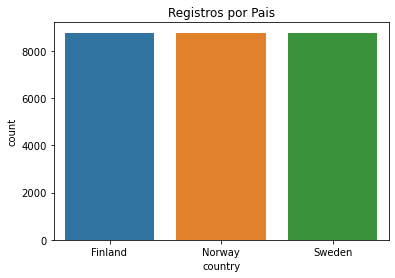

In [7]:
#Cantidad de registros por pais

sns.countplot(x="country", data=train).set_title('Registros por Pais')

Text(0.5, 1.0, 'Registros por Tienda')

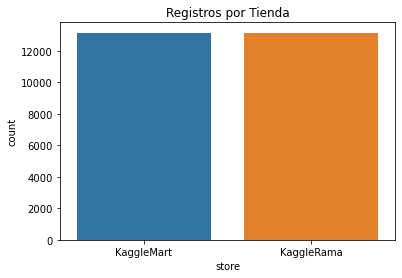

In [8]:
#Cantidad de registros por tienda

sns.countplot(x="store", data=train).set_title('Registros por Tienda')

Text(0.5, 1.0, 'Registros por Producto')

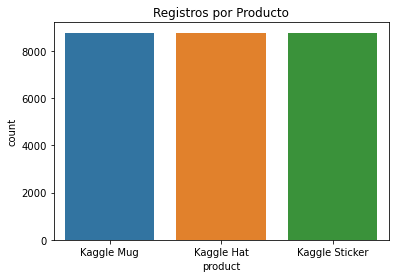

In [9]:
#Cantidad de registros por producto

sns.countplot(x="product", data=train).set_title('Registros por Producto')

Text(0.5, 1.0, 'KDE de ventas por Pais')

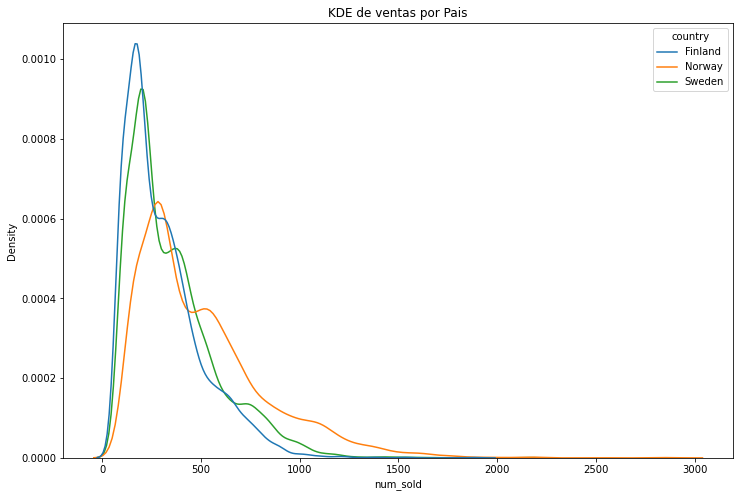

In [10]:
#distribucion de numero de ventas en funcion del pais

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="country").set_title('KDE de ventas por Pais')

Text(0.5, 1.0, 'Ventas segun el dia del año')

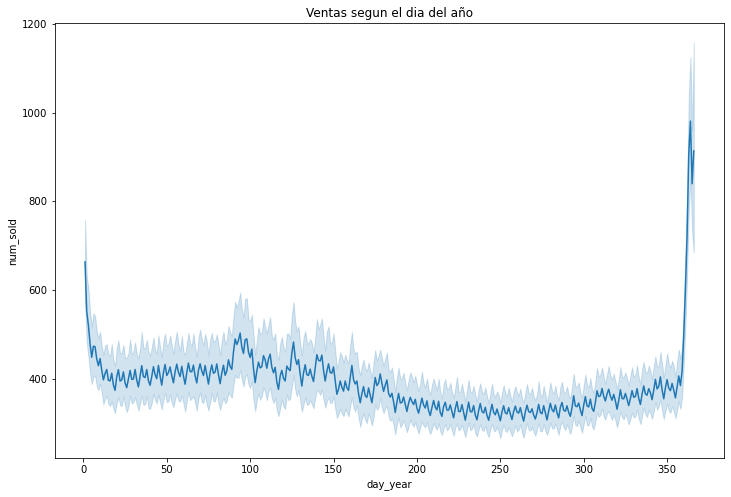

In [31]:
#Cantidad vendida en funcion del dia del año

plt.figure(figsize=(12,8))
sns.lineplot(data=train, x="day_year", y="num_sold").set_title('Ventas segun el dia del año')

Text(0.5, 1.0, 'Ventas segun el dia del año y el pais')

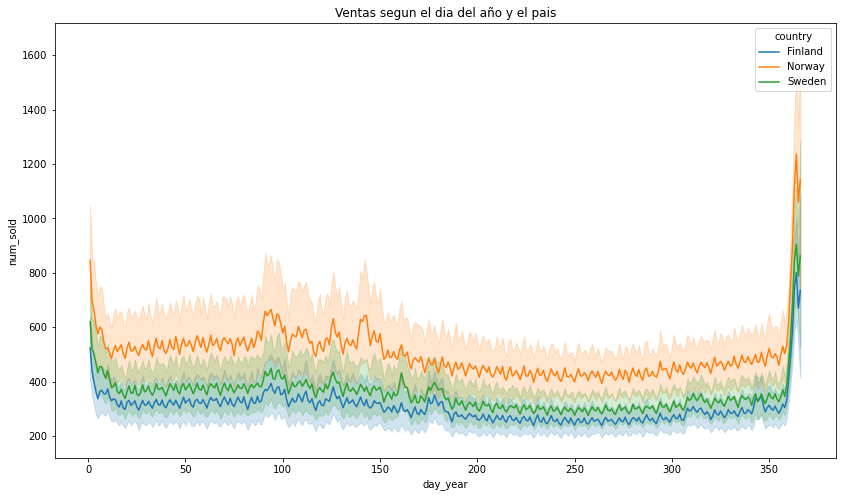

In [34]:
#Cantidad vendida por pais en funcion del dia del año

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="country").set_title('Ventas segun el dia del año y el pais')

Text(0.5, 1.0, 'Ventas segun el dia del año y la tienda')

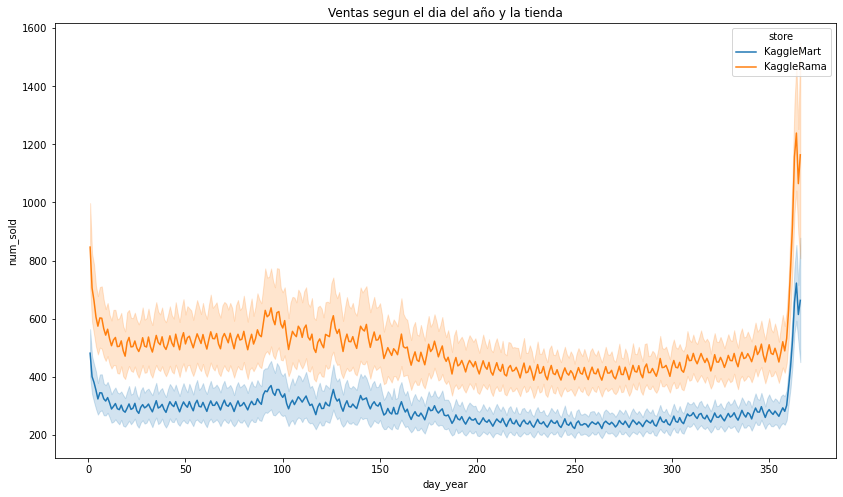

In [35]:
#Cantidad vendida por tienda en funcion del dia del año

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="store").set_title('Ventas segun el dia del año y la tienda')

Text(0.5, 1.0, 'Ventas segun el dia del año y el producto')

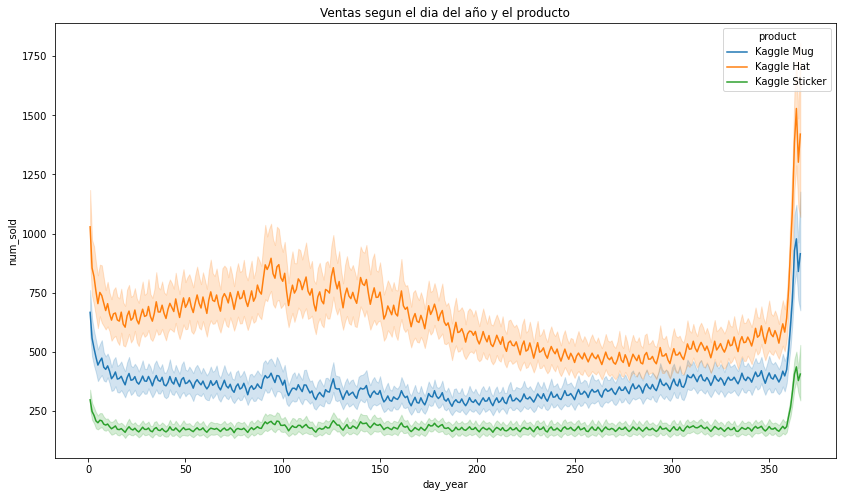

In [36]:
#Cantidad vendida por tipo de producto en funcion del dia del año

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="product").set_title('Ventas segun el dia del año y el producto')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais')

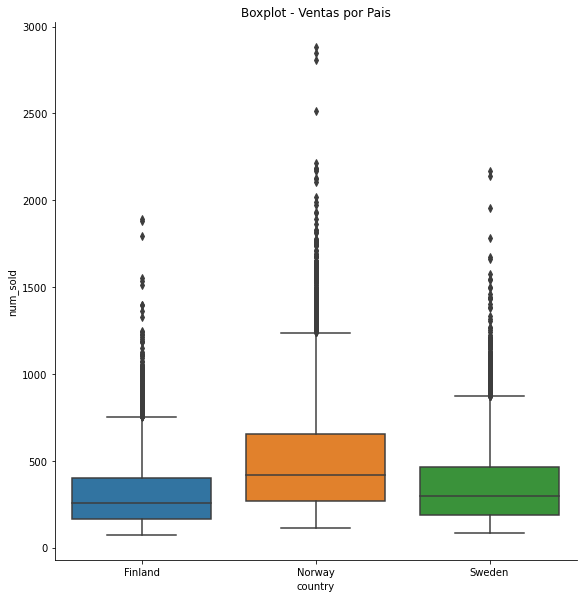

In [11]:
#Cantidad vendida por pais

sns.catplot(x="country", y="num_sold", kind="box", data=train,height=8, aspect=1)
plt.title('Boxplot - Ventas por Pais')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais y año')

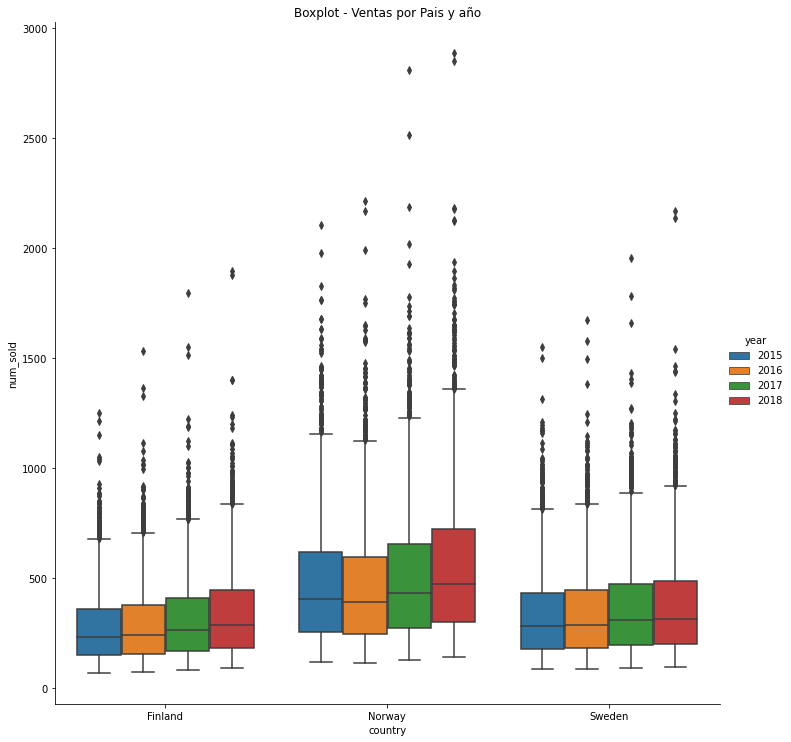

In [12]:
#Cantidad vendida por pais y por año

sns.catplot(x="country", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por Pais y año')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais y tipo de tienda')

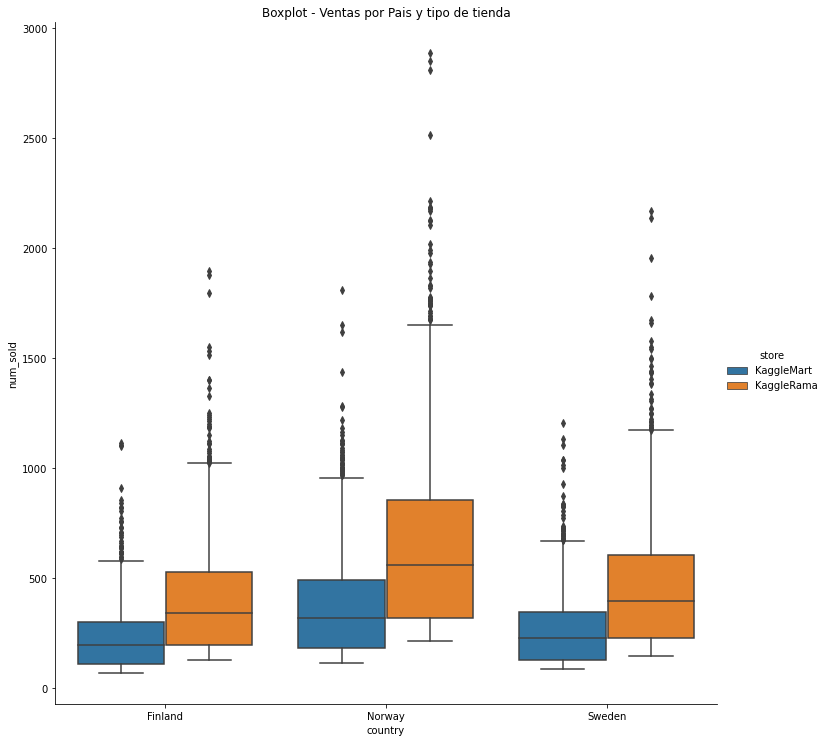

In [13]:
#Cantidad vendida por pais y por tienda

sns.catplot(x="country", y="num_sold", hue="store", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por Pais y tipo de tienda')

Text(0.5, 1.0, 'Boxplot - Ventas por tienda y por año')

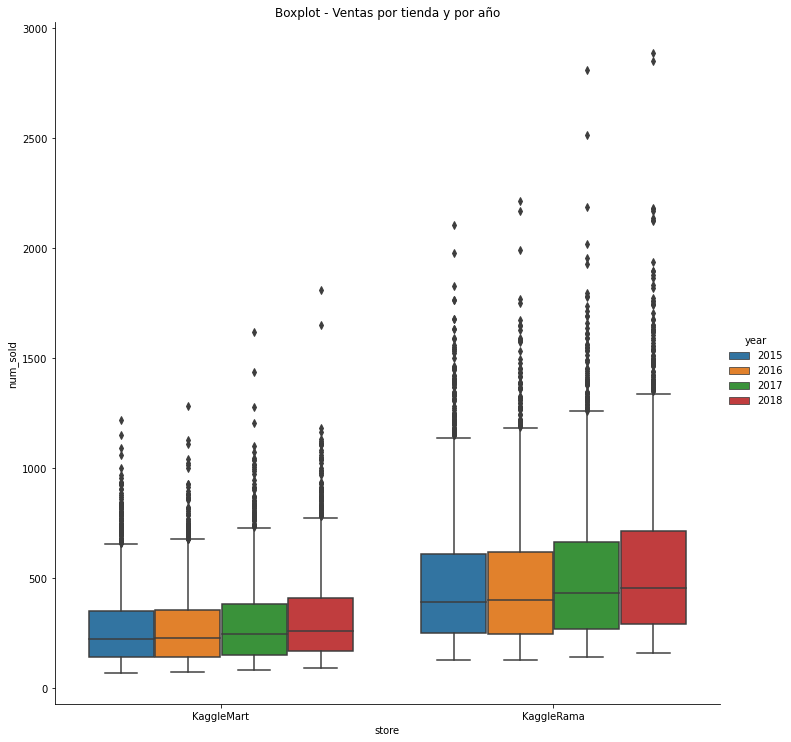

In [14]:
#Cantidad vendida por tienda y por año

sns.catplot(x="store", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por tienda y por año')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais y tipo de producto')

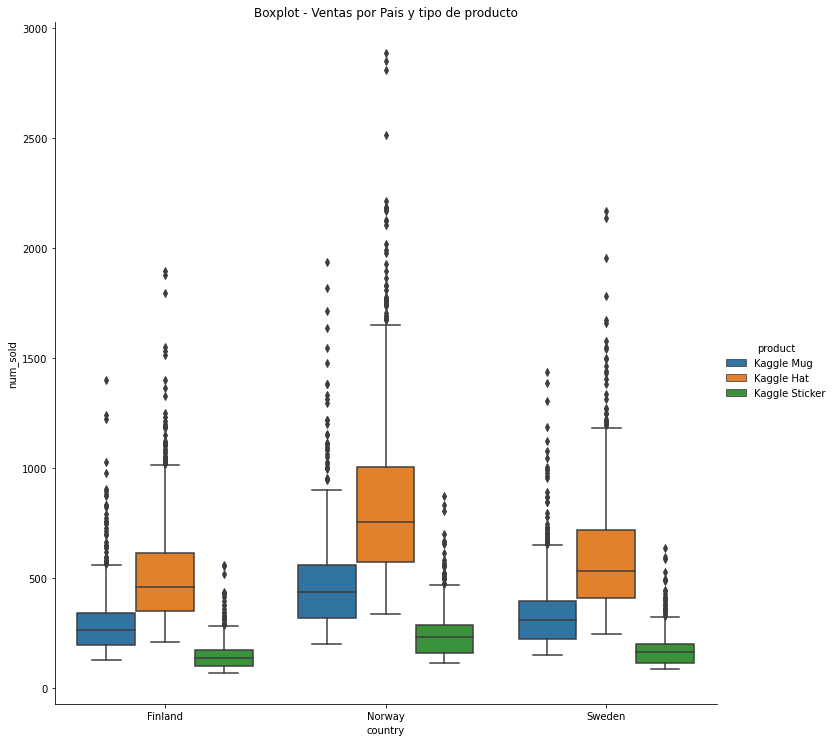

In [15]:
#Cantidad vendida por pais y por producto

sns.catplot(x="country", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por Pais y tipo de producto')

Text(0.5, 1.0, 'Boxplot - Ventas por producto y por año')

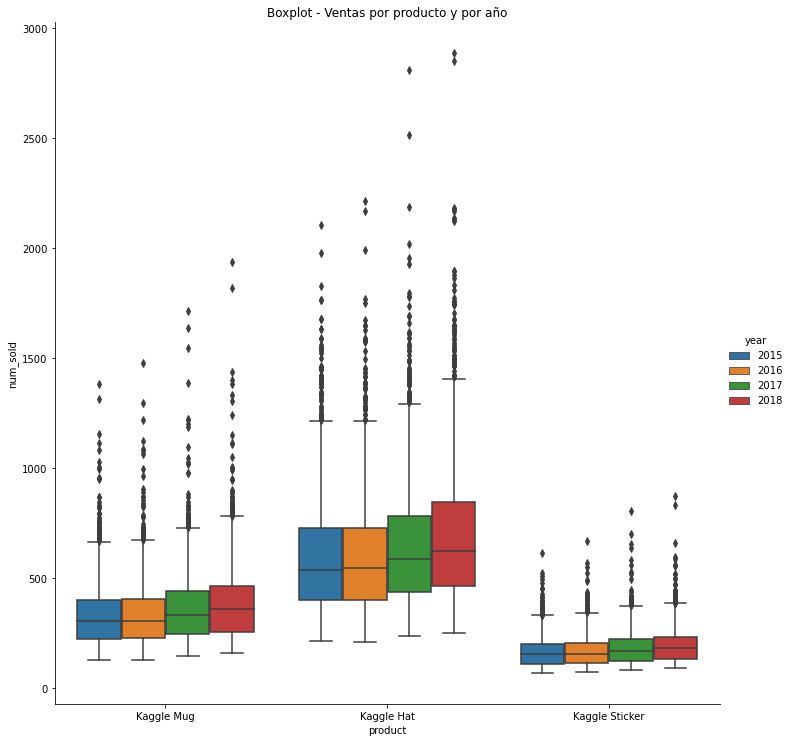

In [16]:
#Cantidad vendida por producto y por año

sns.catplot(x="product", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por producto y por año')

Text(0.5, 1.0, 'Boxplot - Ventas por tienda y tipo de producto')

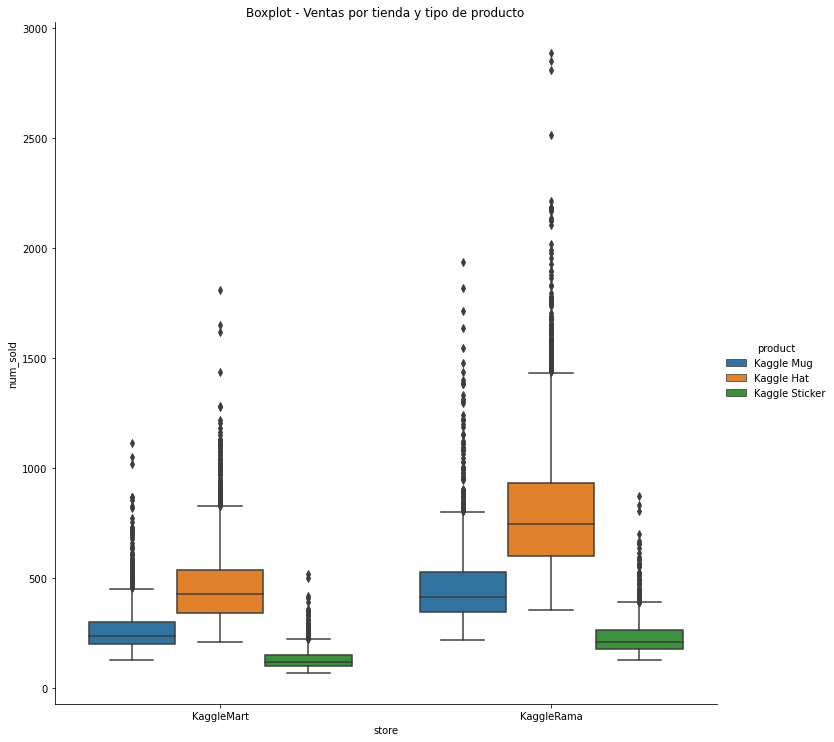

In [17]:
#Cantidad vendida por tienda y por producto

sns.catplot(x="store", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por tienda y tipo de producto')

## 2.2  Analisis Finlandia

In [18]:
filt = 'Finland'

train_finland = train[train['country'] == filt]
train_finland.head()

,row_id,date,country,store,product,num_sold,year,month,week,day_month,day_year
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,1,1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,1,1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,1,1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,1,1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,1,1


Text(0.5, 1.0, 'Title')

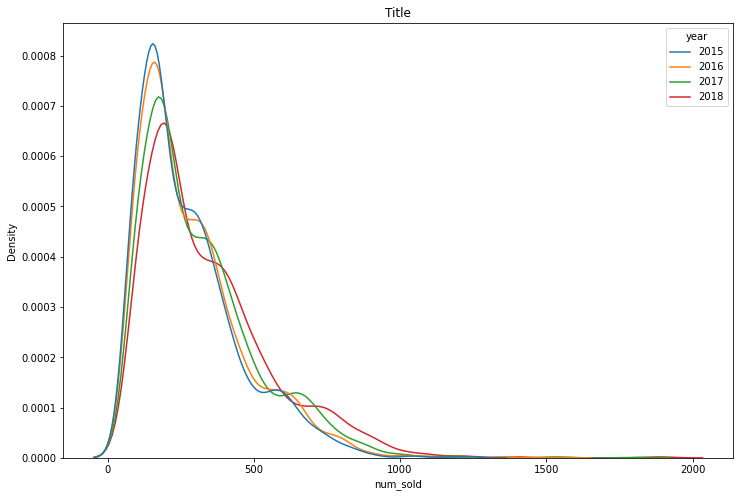

In [19]:
#distribucion de numero de ventas en funcion del pais

plt.figure(figsize=(12,8))
sns.kdeplot(data=train_finland, x="num_sold", hue="year",palette="tab10").set_title('Title')

### 2.2.1 Analisis por Meses

Text(0.5, 1.0, 'Boxplot - Ventas por Mes - Finlandia')

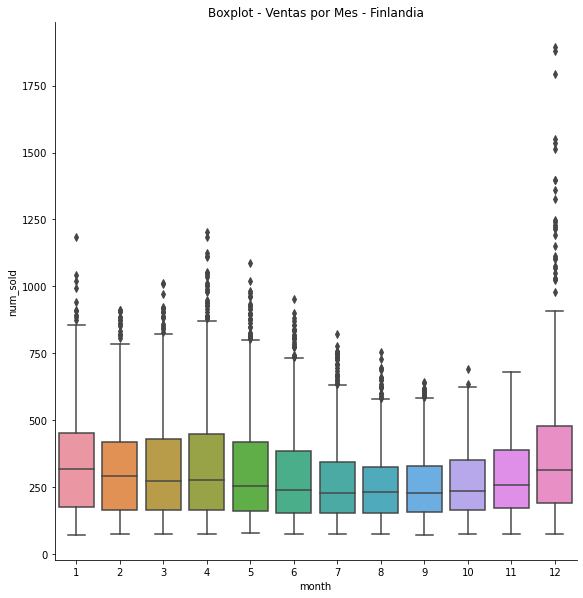

In [20]:
#Cantidad vendida por mes

sns.catplot(x="month", y="num_sold", kind="box", data=train_finland,height=8,aspect=1)
plt.title('Boxplot - Ventas por Mes - Finlandia')

Text(0.5, 1.0, 'Boxplot - Ventas por Mes y tienda - Finlandia')

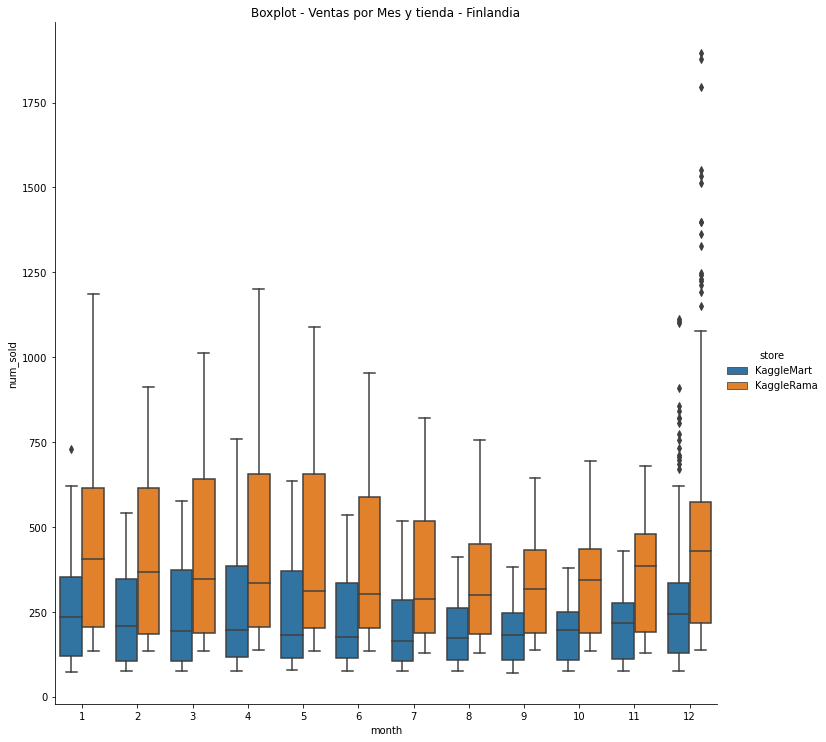

In [21]:
#Cantidad vendida por mes y tienda

sns.catplot(x="month", y="num_sold",hue="store",kind="box", data=train_finland,height=10,aspect=1)
plt.title('Boxplot - Ventas por Mes y tienda - Finlandia')

Text(0.5, 1.0, 'Boxplot - Ventas por semana - Finlandia')

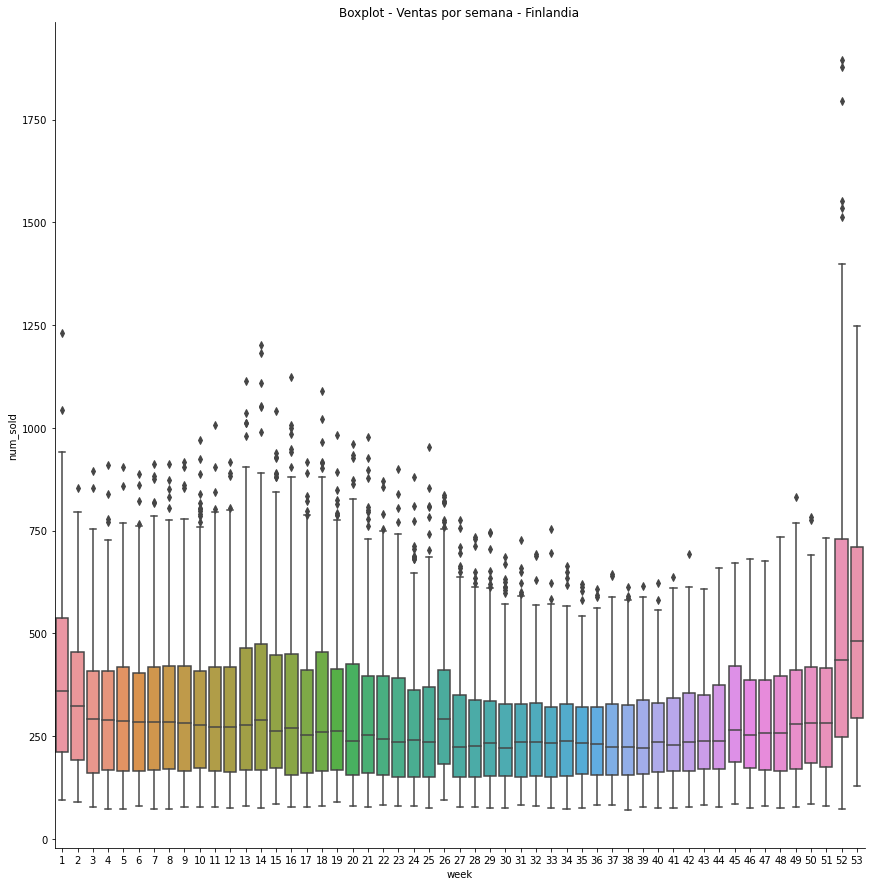

In [22]:
#Cantidad vendida por semana

sns.catplot(x="week", y="num_sold", kind="box", data=train_finland,height=12, aspect=1)
plt.title('Boxplot - Ventas por semana - Finlandia')

Text(0.5, 1.0, 'Boxplot - Ventas por dia del mes - Finlandia')

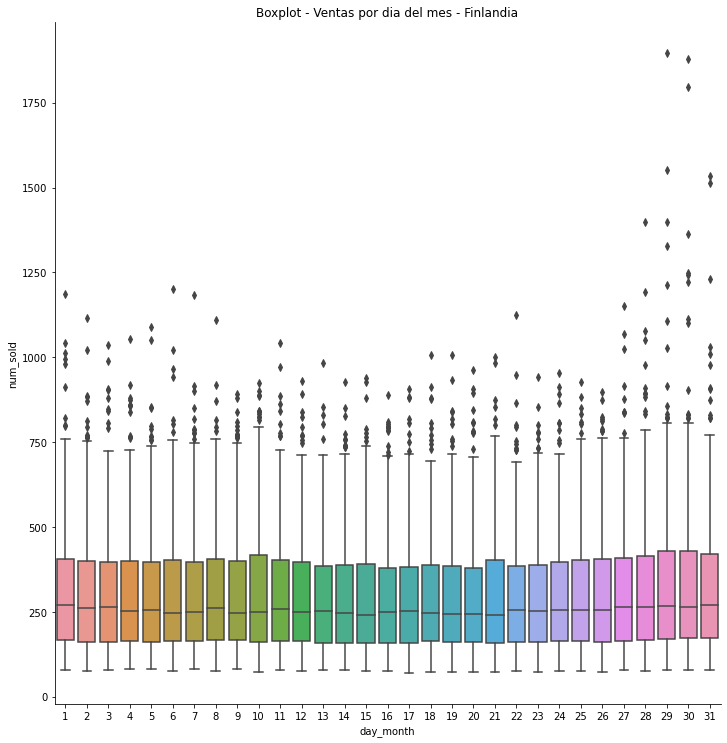

In [24]:
#Cantidad vendida por dia del mes

sns.catplot(x="day_month", y="num_sold", kind="box", data=train_finland,height=10, aspect=1)
plt.title('Boxplot - Ventas por dia del mes - Finlandia')